In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN 
from sklearn.model_selection import StratifiedKFold ,train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings("ignore", category=FutureWarning)  # Ignora FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignora DeprecationWarnings

C:\Users\GEANVI~1\Anaconda3\envs\venv\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [25]:
# Configurando a visualização
plt.style.use('seaborn')
sns.set_palette("husl")
%matplotlib inline

In [26]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)     

# 1. Carregando os dados 

In [27]:
df = pd.read_csv('Downloads/framingham.csv')

In [47]:
df.shape

(4240, 16)

# 2. Iniciando analise exploratoria

In [28]:
# Verificando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [30]:
# Verificando o percentual de dados faltantes
(df.isna().sum() / df.shape[0] * 100).round(2).astype(str) + '%'

male                0.0%
age                 0.0%
education          2.48%
currentSmoker       0.0%
cigsPerDay         0.68%
BPMeds             1.25%
prevalentStroke     0.0%
prevalentHyp        0.0%
diabetes            0.0%
totChol            1.18%
sysBP               0.0%
diaBP               0.0%
BMI                0.45%
heartRate          0.02%
glucose            9.15%
TenYearCHD          0.0%
dtype: object

In [31]:
# Analisando distribuição dos dados
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


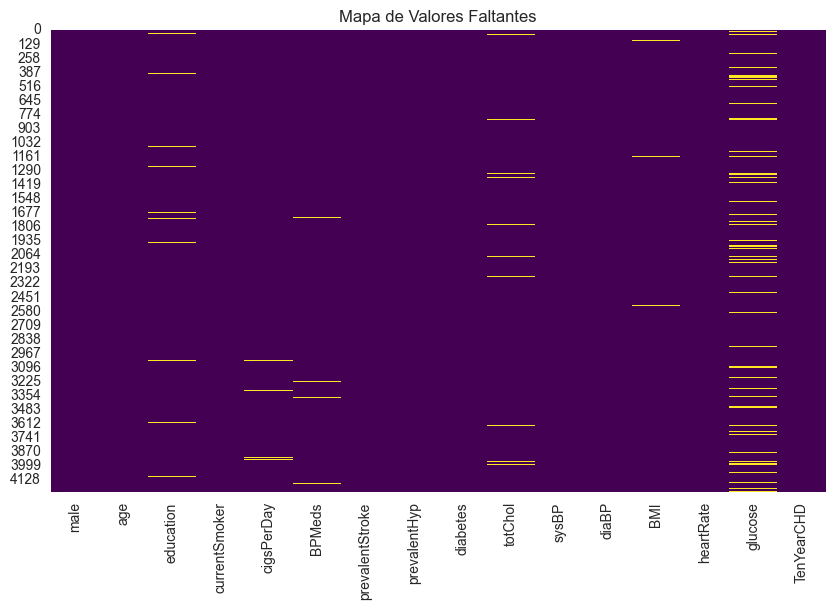

In [32]:
# Graffico para visualização dos dados faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Valores Faltantes")
plt.show()

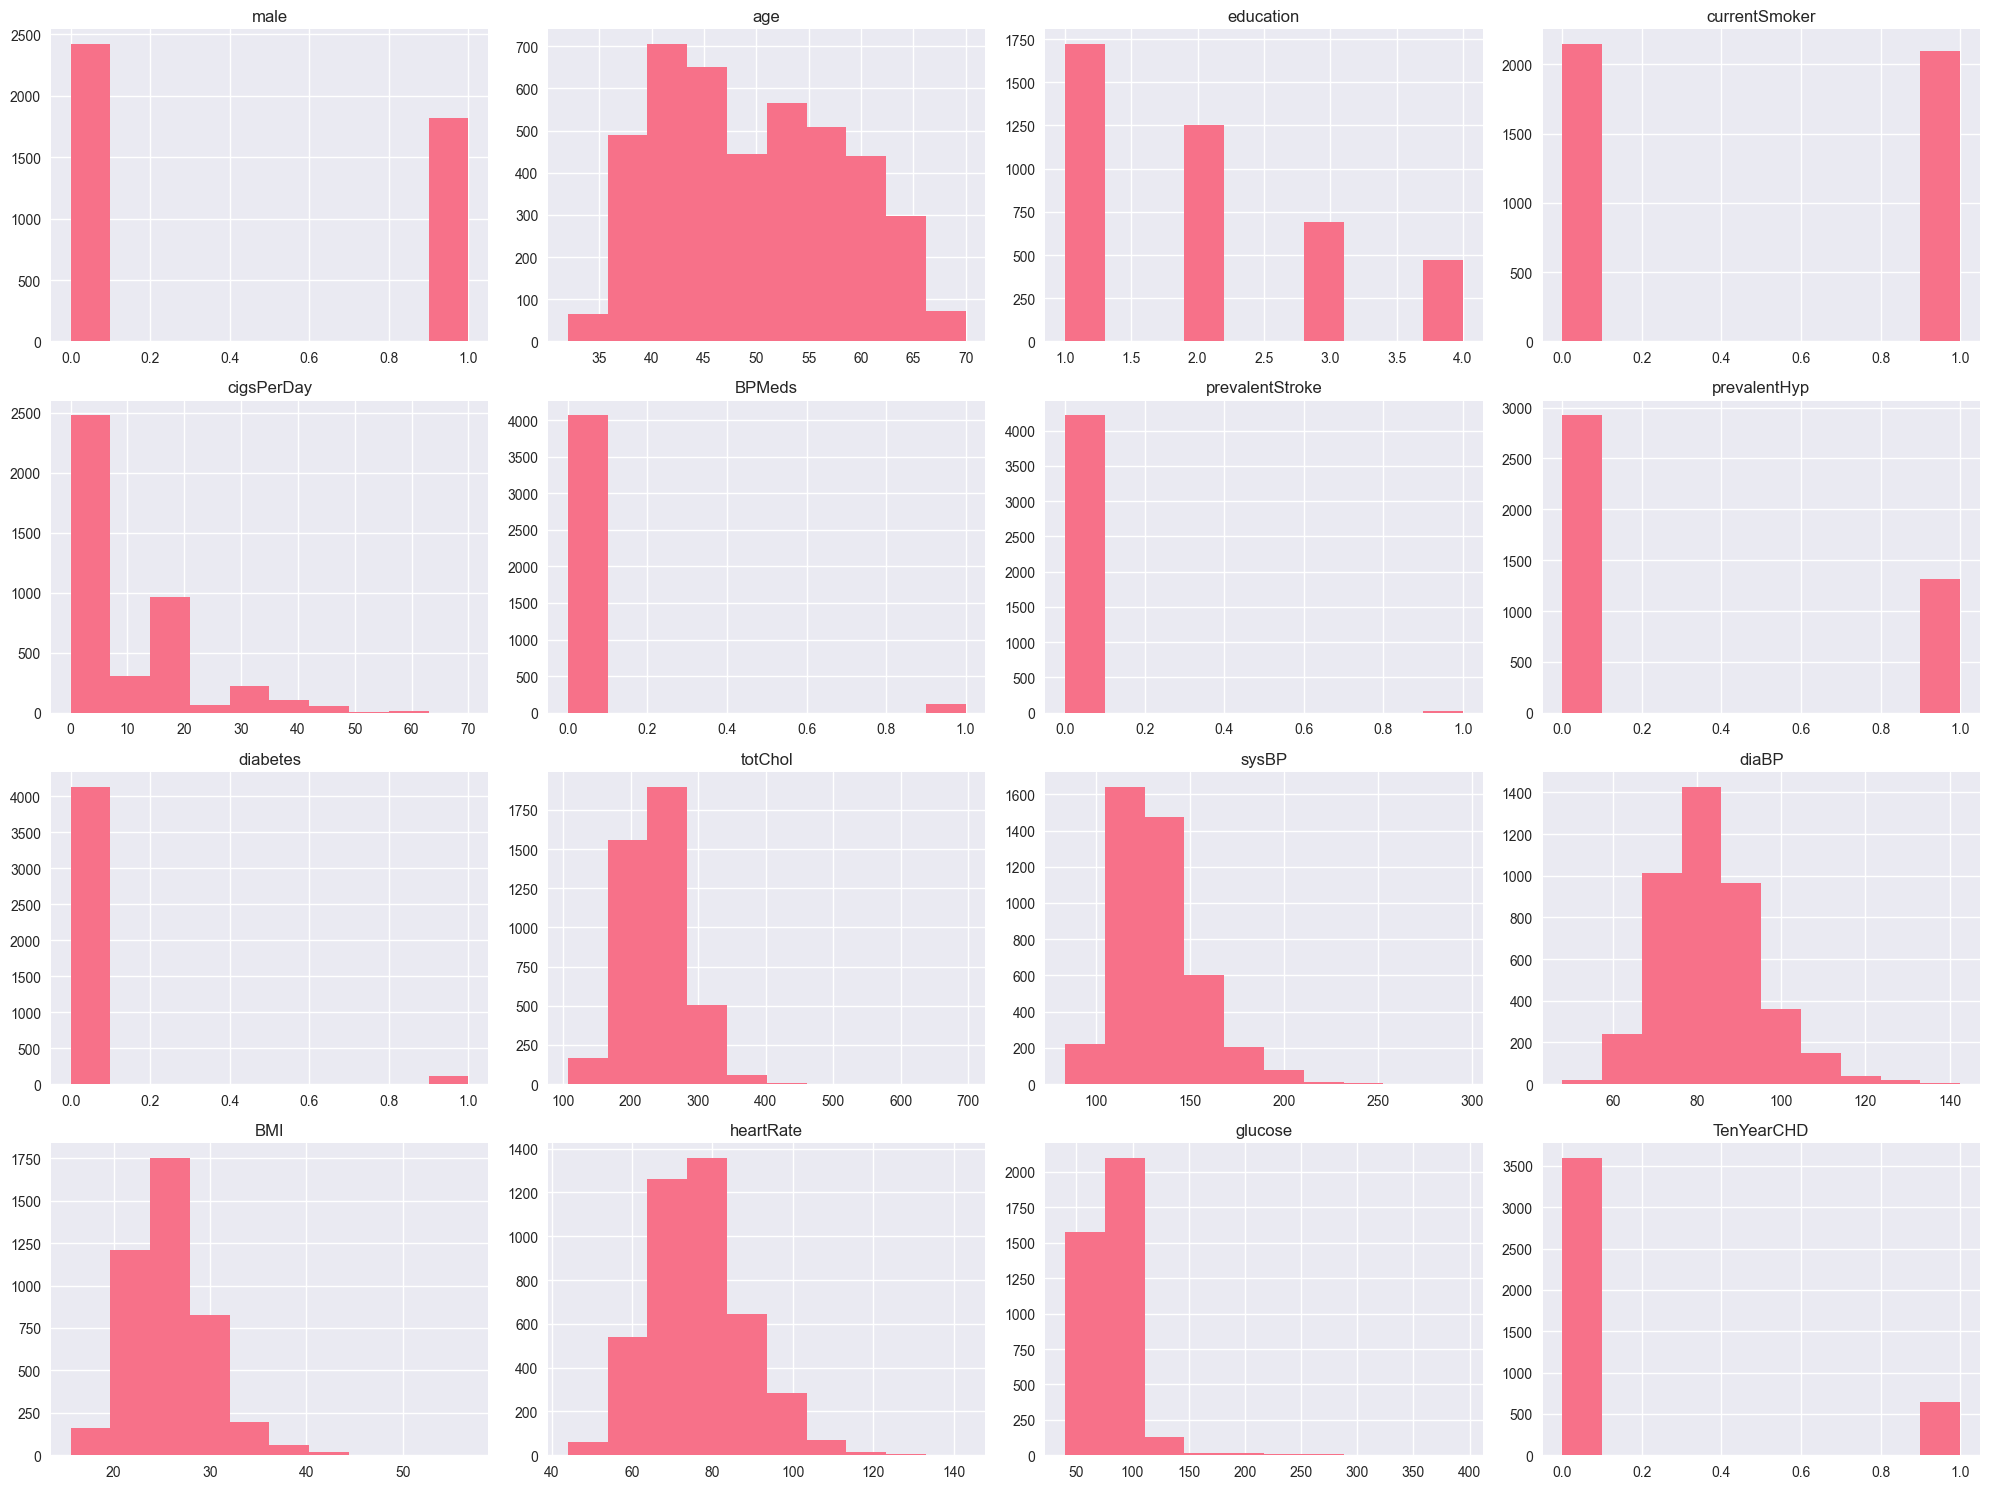

In [33]:
# Plotando histogramas para todas as variáveis numéricas
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

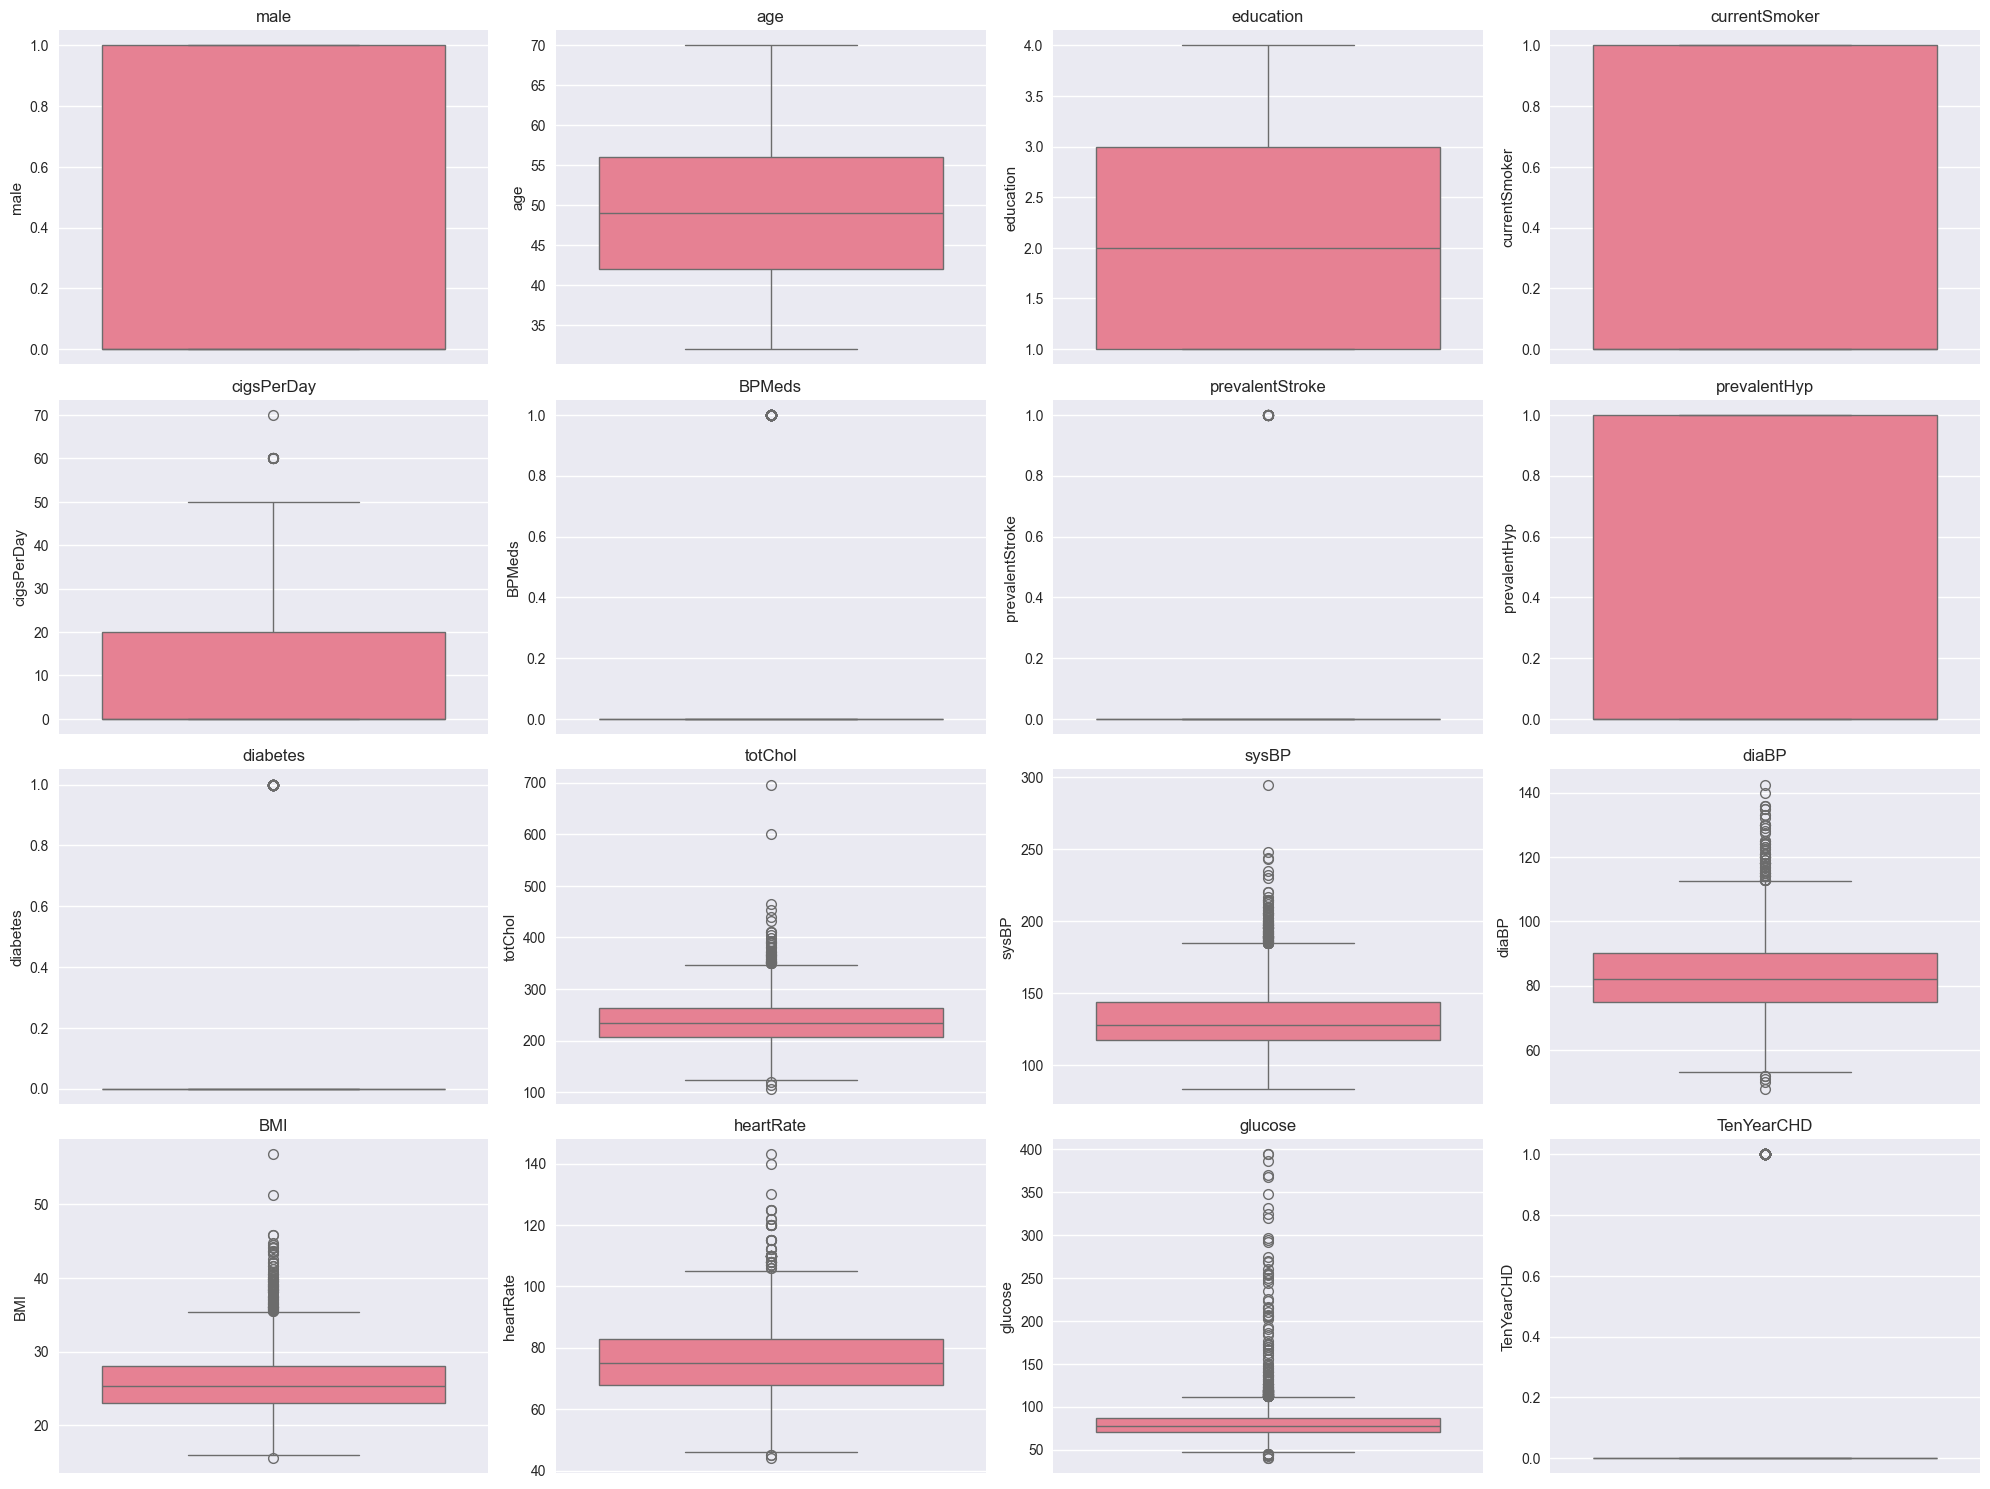

In [34]:
# Boxplots para identificar outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

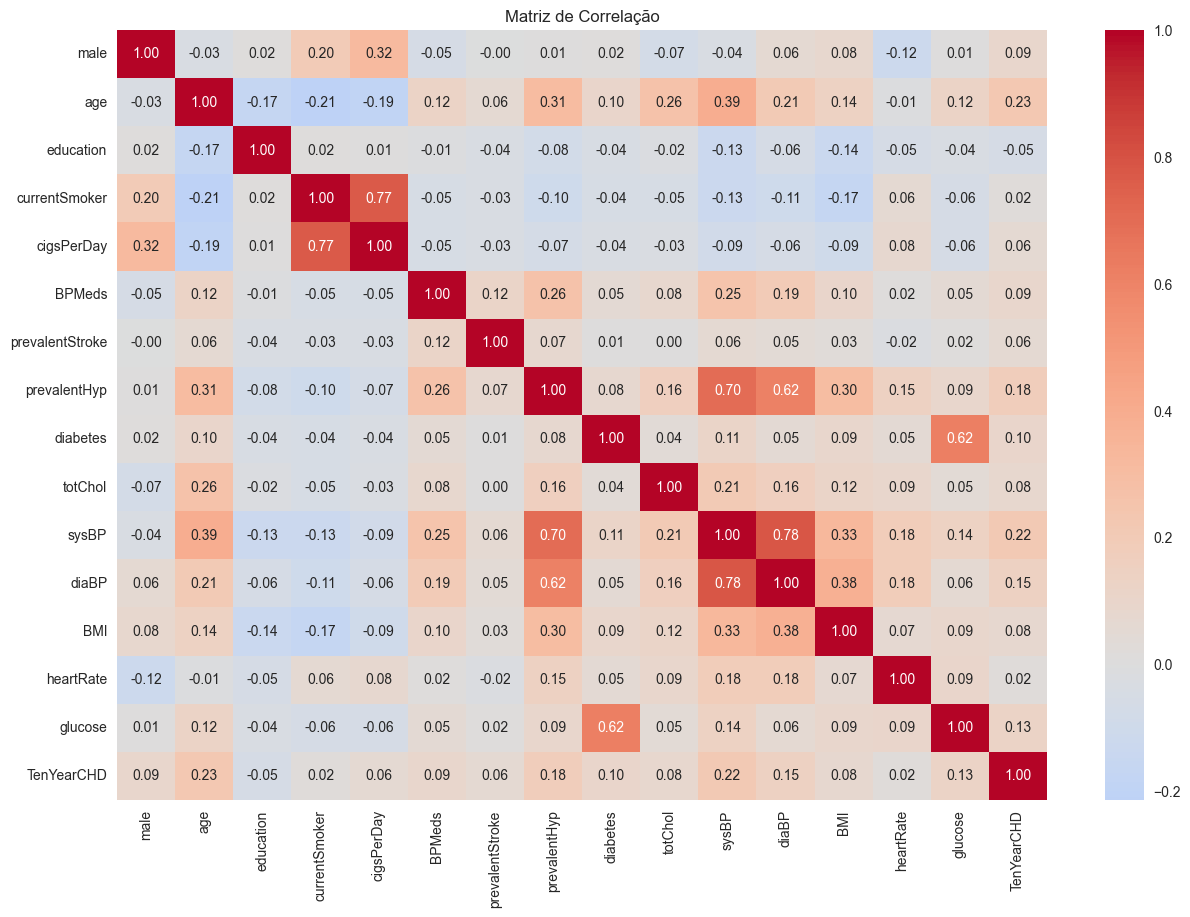

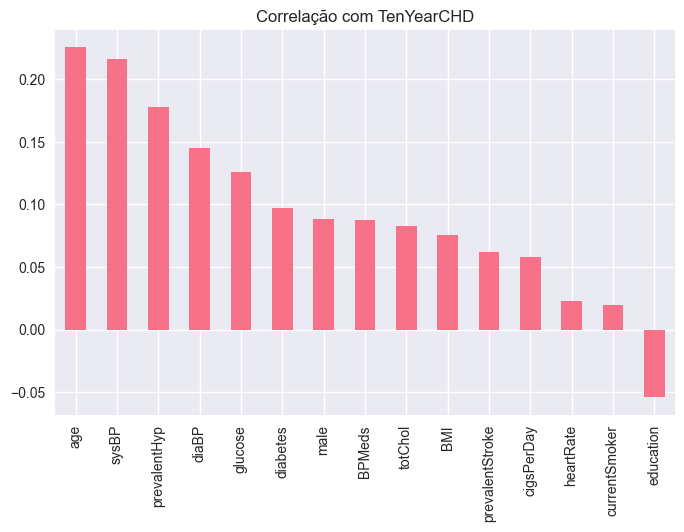

In [35]:
# Matriz de correlação
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

# Correlação com a variável target (TenYearCHD)
plt.figure(figsize=(8, 5))
df.corr()['TenYearCHD'].sort_values(ascending=False).drop('TenYearCHD').plot(kind='bar')
plt.title('Correlação com TenYearCHD')
plt.show()

# 3. Iniciando tratamento dos dados 

In [36]:
# Imputando dados em colunas faltantes

## 1. education (2.48%) - Variável categórica ordinal (1 a 4)
# Modificação para evitar warning de inplace
df['education'] = df['education'].fillna(df['education'].mode()[0])

## 2. cigsPerDay (0.68%) - Variável numérica discreta
# Criação de máscaras para evitar chain assignment
non_smokers_mask = (df['currentSmoker'] == 0) & (df['cigsPerDay'].isna())
smokers_mask = (df['currentSmoker'] == 1) & (df['cigsPerDay'].isna())

# Atribuição direta sem chain
df.loc[non_smokers_mask, 'cigsPerDay'] = 0
df.loc[smokers_mask, 'cigsPerDay'] = df[df['currentSmoker'] == 1]['cigsPerDay'].median()

## 3. BPMeds (1.25%) - Variável binária (0 ou 1)
# Substituição do inplace
df['BPMeds'] = df['BPMeds'].fillna(0)

## 4. totChol (1.18%) - Variável numérica contínua
# Correção do groupby com observed=True
df['age_group'] = pd.cut(df['age'], bins=[30,40,50,60,70])
df['totChol'] = df.groupby('age_group', observed=True)['totChol'].transform(lambda x: x.fillna(x.median()))
df = df.drop('age_group', axis=1)

## 5. BMI (0.45%) - Variável numérica contínua
# Usando transform para manter o índice original
df['BMI'] = df.groupby('male', observed=True)['BMI'].transform(lambda x: x.fillna(x.median()))

## 6. heartRate (0.02%) - Variável numérica contínua
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

## 7. glucose (9.15%) - Variável numérica contínua
df['glucose'] = df.groupby('diabetes', observed=True)['glucose'].transform(lambda x: x.fillna(x.median()))

# Verificação final
print("\nValores faltantes após tratamento:")
print(df.isnull().sum())


Valores faltantes após tratamento:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [37]:
# Função para tratar outliers usando o método IQR
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Aplicando para colunas com outliers significativos
outlier_cols = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for col in outlier_cols:
    df = treat_outliers(df, col)


Distribuição da variável target:
TenYearCHD
0    84.811321
1    15.188679
Name: proportion, dtype: float64


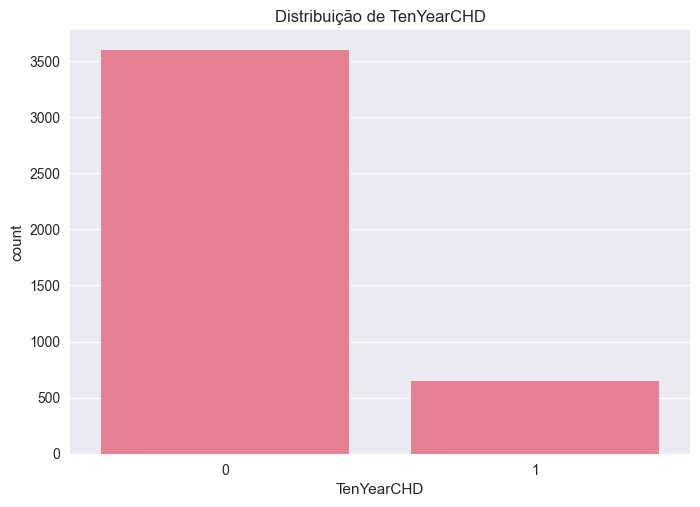

In [38]:
# Separando features e target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Lista de colunas numéricas e categóricas
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Padronização das features numéricas
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Verificando o balanceamento da variável target
print("\nDistribuição da variável target:")
print(y.value_counts(normalize=True) * 100)

# Visualização
sns.countplot(x=y)
plt.title('Distribuição de TenYearCHD')
plt.show()

In [39]:
# Verificando tipo dos dados
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

# 4. Analisando correlação dos dados e ditribuindo variaveis

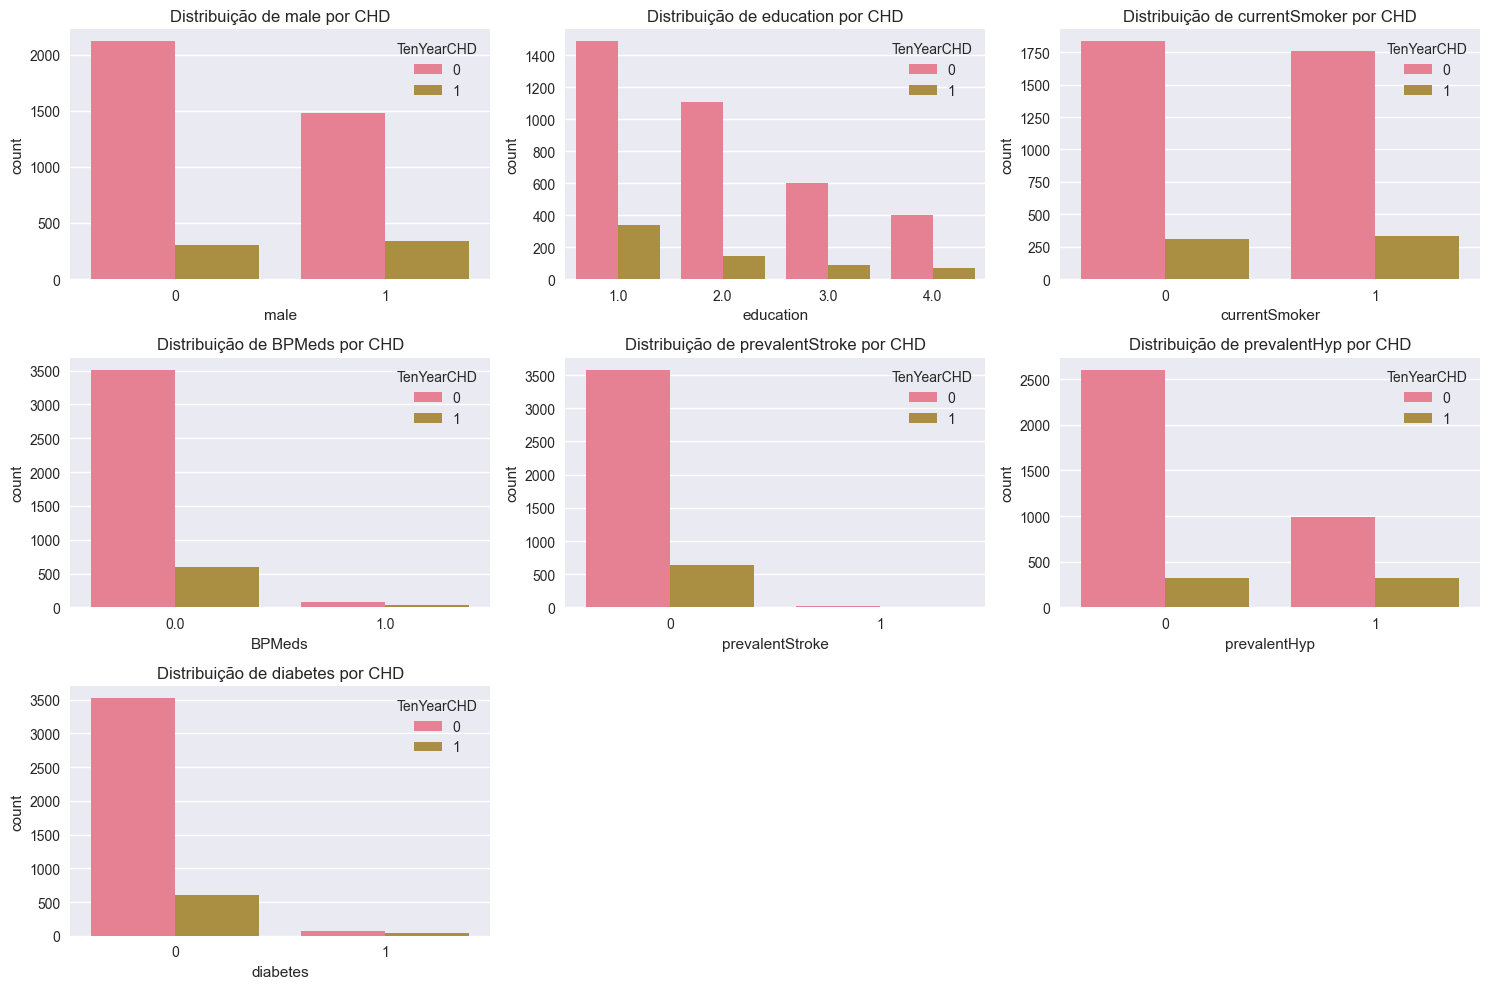

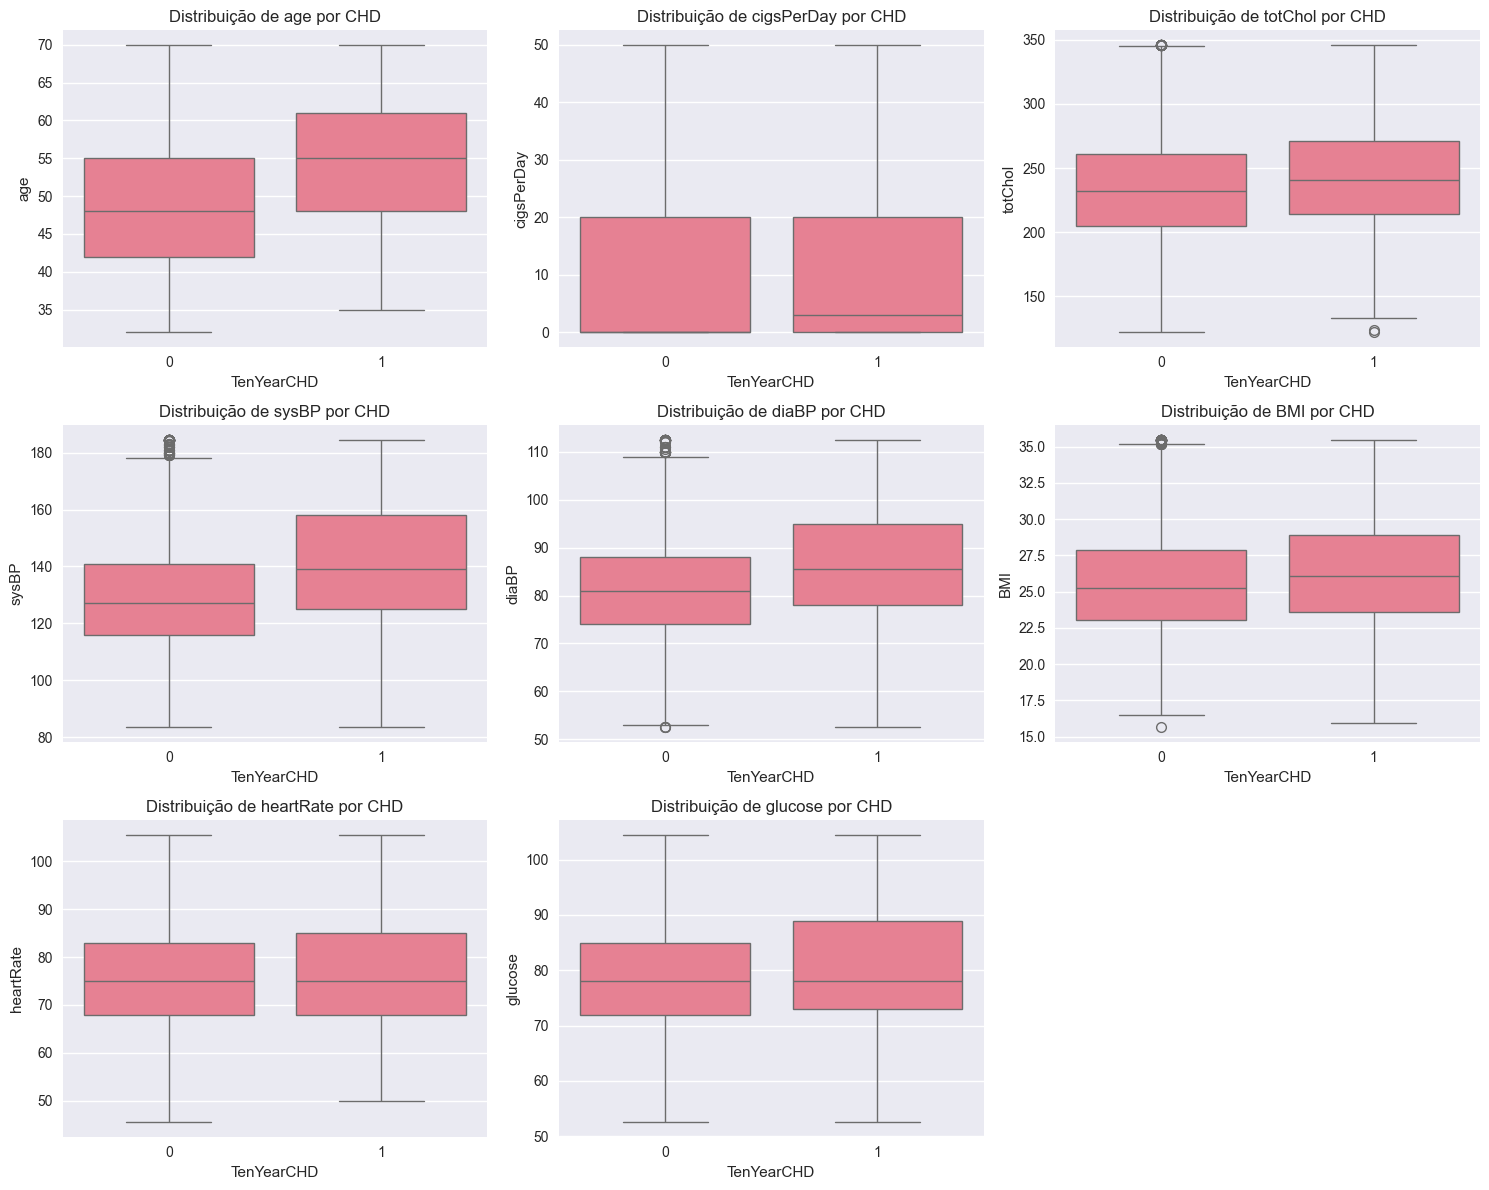

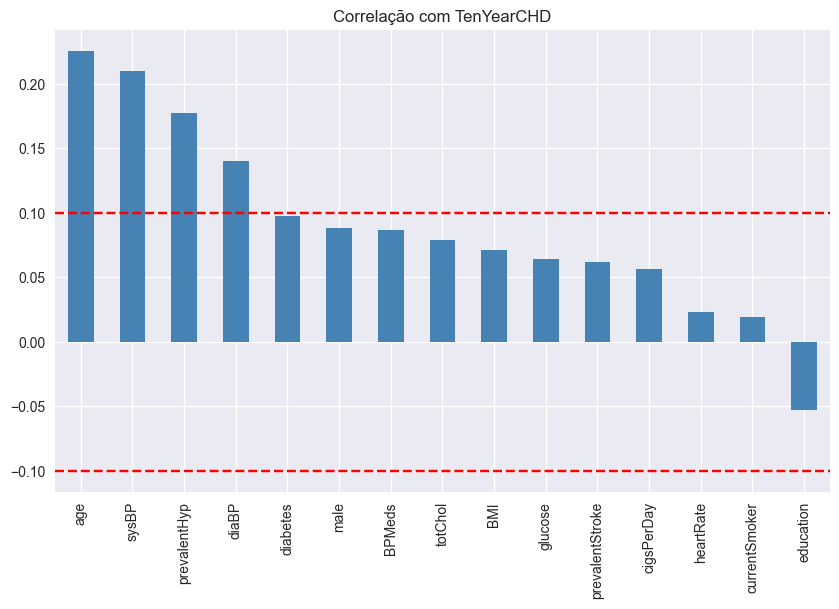

In [40]:
# Distribuição das variáveis categóricas
categorical_vars = ['male', 'education', 'currentSmoker', 'BPMeds', 
                   'prevalentStroke', 'prevalentHyp', 'diabetes']

plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, hue='TenYearCHD', data=df)
    plt.title(f'Distribuição de {var} por CHD')
plt.tight_layout()
plt.show()

# 1.2 Distribuição das variáveis numéricas
numeric_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 
               'BMI', 'heartRate', 'glucose']

plt.figure(figsize=(15, 12))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='TenYearCHD', y=var, data=df)
    plt.title(f'Distribuição de {var} por CHD')
plt.tight_layout()
plt.show()

#  Análise de correlação com a variável target
plt.figure(figsize=(10, 6))
corr_with_target = df.corr()['TenYearCHD'].sort_values(ascending=False)
corr_with_target.drop('TenYearCHD').plot(kind='bar', color='steelblue')
plt.title('Correlação com TenYearCHD')
plt.axhline(y=0.1, color='r', linestyle='--')
plt.axhline(y=-0.1, color='r', linestyle='--')
plt.show()

# 5. Dividindo os dados em treino e teste e treinando o modelo

In [41]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [42]:
scaler = StandardScaler()
X_balanced = scaler.fit_transform(X_balanced)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.1, random_state=42, stratify=y_balanced
)


Gradient Boosting Results:
Accuracy: 83.19%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       360
           1       0.85      0.81      0.83       360

    accuracy                           0.83       720
   macro avg       0.83      0.83      0.83       720
weighted avg       0.83      0.83      0.83       720



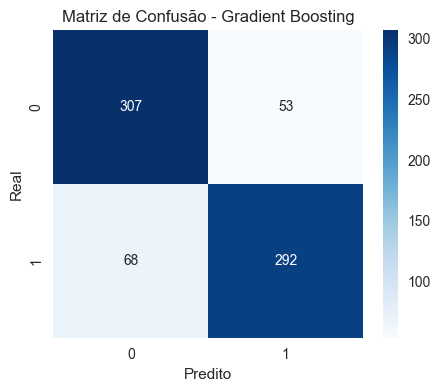


Random Forest Results:
Accuracy: 90.28%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       360
           1       0.89      0.92      0.90       360

    accuracy                           0.90       720
   macro avg       0.90      0.90      0.90       720
weighted avg       0.90      0.90      0.90       720



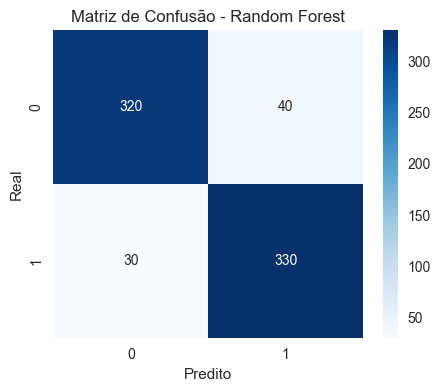


XGBoost Results:
Accuracy: 90.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       360
           1       0.92      0.89      0.90       360

    accuracy                           0.91       720
   macro avg       0.91      0.91      0.91       720
weighted avg       0.91      0.91      0.91       720



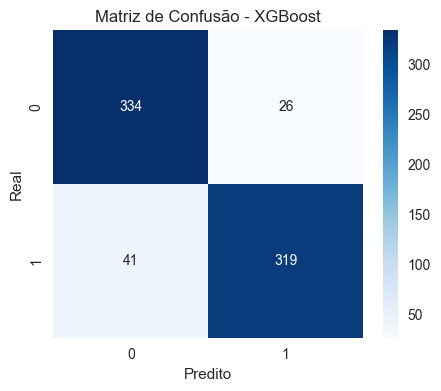

C:\Users\GEANVI~1\Anaconda3\envs\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\GEANVI~1\Anaconda3\envs\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\GEANVI~1\Anaconda3\envs\venv\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\GEANVI~1\Anaconda3\envs\venv\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\GEANVI~1\Anaconda3\envs\venv\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.Cre

[LightGBM] [Info] Number of positive: 3236, number of negative: 3236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2458
[LightGBM] [Info] Number of data points in the train set: 6472, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Results:
Accuracy: 90.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       360
           1       0.94      0.87      0.90       360

    accuracy                           0.91       720
   macro avg       0.91      0.91      0.91       720
weighted avg       0.91      0.91      0.91       720



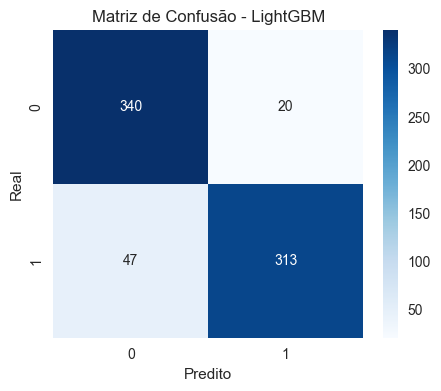


Decision Tree Results:
Accuracy: 81.67%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       360
           1       0.81      0.83      0.82       360

    accuracy                           0.82       720
   macro avg       0.82      0.82      0.82       720
weighted avg       0.82      0.82      0.82       720



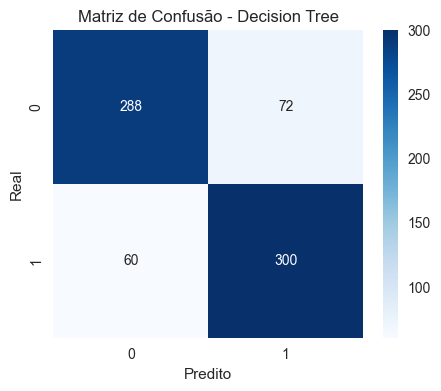

In [44]:
# Inicializando os modelos
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Treinando e avaliando cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'report': report
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print("Classification Report:")
    print(report)
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

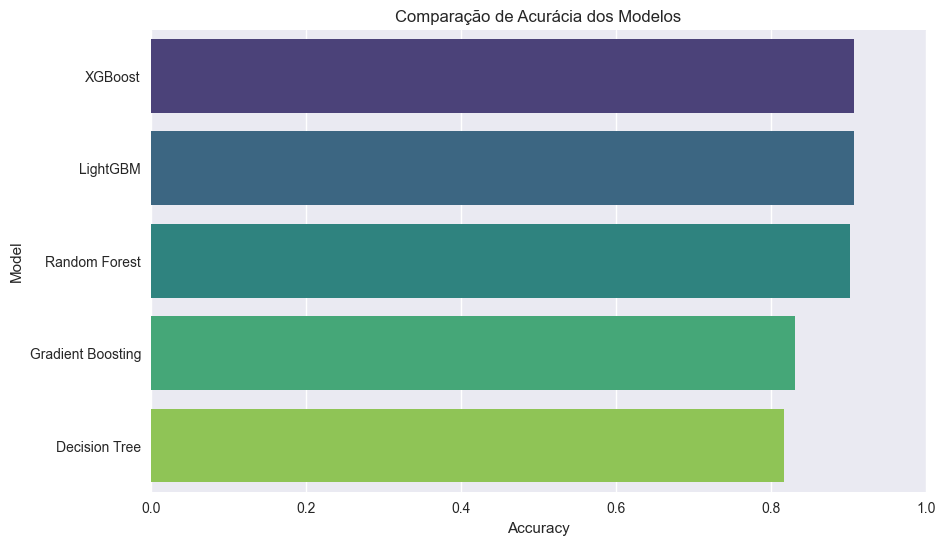

In [45]:
# Comparando a acurácia dos modelos
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [result['accuracy'] for result in results.values()]
}).sort_values('Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=model_comparison, palette='viridis')
plt.title('Comparação de Acurácia dos Modelos')
plt.xlim(0, 1)
plt.show()

In [46]:
# Selecionando o melhor modelo
best_model_name = model_comparison.iloc[0]['Model']
best_model = models[best_model_name]

# Validação cruzada
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"\nValidação Cruzada para {best_model_name}:")
print(f"Scores: {cv_scores}")
print(f"Média: {np.mean(cv_scores*100):.2f}%")
print(f"Desvio Padrão: {np.std(cv_scores*100):.2f}%")


Validação Cruzada para XGBoost:
Scores: [0.84433962 0.82429245 0.84080189 0.82665094 0.83018868]
Média: 83.33%
Desvio Padrão: 0.79%
